# Importing Libraries

In [1]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
import cv2
#from coffeeshop.coffeeshop import Coffeeshop
from tensordash.tensordash import Tensordash
import matplotlib.pyplot as plt
import numpy as np
import glob
import keras
from keras.models import Sequential,Model
from keras.optimizers import Adam
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


# Importing Non-Enhanced Data

In [3]:
x=list()
y=list()
fire=glob.glob('augmented fire/*.jpg')
nfire=glob.glob('augmented no fire/*.jpg')
for i in fire:
    img=cv2.imread(i,1)
    img=cv2.resize(img,(50,50))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(50, 50, 3)
    x.append(img)
    y.append(1)
for j in nfire:
    img=cv2.imread(j,1)
    img=cv2.resize(img,(50,50))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(50, 50, 3)
    x.append(img)
    y.append(0)
x=np.asarray(x)
y=np.asarray(y)
y=to_categorical(y)

# Importing Validation Data

In [4]:
firel=glob.glob('val/fire/*.jpg')
nfirel=glob.glob('val/no fire/*.jpg')
xval=list()
yval=list()
for i in firel:
    img=cv2.imread(i,1)
    img=cv2.resize(img,(50,50))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(50, 50, 3)
    img=img.tolist()
    xval.append(img)
    yval.append(1)
for i in nfirel:
    img=cv2.imread(i,1)
    img=cv2.resize(img,(50,50))
    img=np.float32(img)
    img/=255.0
    img = img.reshape(50, 50, 3)
    img=img.tolist()
    xval.append(img)
    yval.append(0)
xval=np.asarray(xval)
yval=np.asarray(yval)
yval=to_categorical(yval)

# Neural Network

In [5]:
"""def NN():
    model = Sequential()
    model.add(Conv2D(16, (3,3),input_shape=(50,50,3),padding='same', activation='sigmoid'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(8, (3, 3), activation = 'sigmoid',padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation = 'sigmoid'))
    model.add(Dense(64, activation = 'sigmoid'))
    model.add(Dense(2, activation = 'softmax'))
    model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model"""

In [5]:
def NN():
    model = Sequential()
    model.add(Conv2D(16, (3,3),input_shape=(50,50,3),padding='same', activation='sigmoid'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(8, (3, 3), activation = 'sigmoid',padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation = 'sigmoid'))
    model.add(Dense(64, activation = 'sigmoid'))
    model.add(Dense(2, activation = 'softmax'))
    model.compile(Adam(lr = 0.001), loss = 'mse', metrics = ['accuracy'])
    return model

In [6]:
model=NN()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               147584    
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [7]:
histories=model.fit(x,y,epochs=7,batch_size=5,verbose=1,shuffle=True,validation_data=(xval,yval))

Train on 6500 samples, validate on 1759 samples
Epoch 1/7
6500/6500 [==============================] - 20s 3ms/step - loss: 0.1265 - accuracy: 0.8372 - val_loss: 0.2898 - val_accuracy: 0.5804
Epoch 2/7
6500/6500 [==============================] - 20s 3ms/step - loss: 0.1112 - accuracy: 0.8437 - val_loss: 0.1729 - val_accuracy: 0.8158
Epoch 3/7
6500/6500 [==============================] - 19s 3ms/step - loss: 0.0945 - accuracy: 0.8706 - val_loss: 0.0974 - val_accuracy: 0.7993
Epoch 4/7
6500/6500 [==============================] - 15s 2ms/step - loss: 0.0820 - accuracy: 0.8918 - val_loss: 0.0778 - val_accuracy: 0.8590
Epoch 5/7
6500/6500 [==============================] - 13s 2ms/step - loss: 0.0765 - accuracy: 0.9003 - val_loss: 0.0824 - val_accuracy: 0.8272
Epoch 6/7
6500/6500 [==============================] - 19s 3ms/step - loss: 0.0706 - accuracy: 0.9060 - val_loss: 0.1596 - val_accuracy: 0.7675
Epoch 7/7
6500/6500 [==============================] - 18s 3ms/step - loss: 0.0678 - acc

In [8]:
model.save('tes.h5')

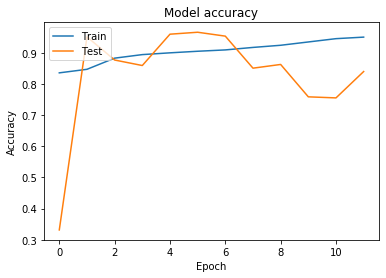

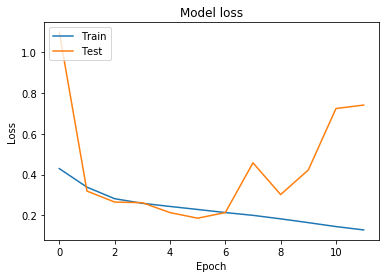

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(histories.history['accuracy'])
plt.plot(histories.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('resources/normal_accuracy.png', dpi=300)
plt.show()

# Plot training & validation loss values
plt.plot(histories.history['loss'])
plt.plot(histories.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('resources/normal_loss.png', dpi=300)
plt.show()